# Note
this code is written in a jupyter notebook enviroment, the csv files should be uploded before running the code.

# Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities,certain attributes of each product and store have been defined.

It is required to build a predictive model and find out the sales of each product at a particular store in order to help BigMart to understand the properties of products and stores which play a key role in increasing sales.


# Hypothesis Generation

It is important to sort out the data that will be valuable in our study before even looking at the dataset in order to be able to focus on the topic and avoid bias or mis-leading data.

The sole purpose of this study is to find what increase the sales of a certain product or decrease it.

Many factors could affect the product sales, such as: 
* product properites: specs, its MPR, its price
* Store properites : Location, Size , Stock 


# Loading Packages and Data

In [84]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso , Ridge
#installing xgboost
! pip install xgboost

import xgboost as xgb


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")



In [85]:
#loading_data
train_data=pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')

# Data Structure and Content


In [86]:
# explore the first 5 rows of train data
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [87]:
# explore the first 5 rows of test data
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Exploratory Data Analysis

In [88]:
#exploring the train set

print (train_data.info())
print (train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
       Item_Weight  Item_Visibility     

it is clear that both weight and Outlet_size columns has some null values which need to be treated

In [89]:
#exploring the test set
print (test_data.info())
print (test_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000  

# handling missing values

In [90]:
#missing values in an descending order and their percentage
print("train:\n")
print(train_data.isnull().sum().sort_values(ascending=False),"\n\n",train_data.isnull().sum()/train_data.shape[0]*100)
print("\n\n test:\n")
print(test_data.isnull().sum().sort_values(ascending=False),"\n\n",test_data.isnull().sum()/test_data.shape[0]*100)

train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


 test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

missing values % in train and test sets are nearly the same

Since Outlet_Size is a categorical column, therefore we will impute missing values with Medium the mode value
 

In [91]:
print("train data mode, test data mode\n", [train_data['Outlet_Size'].mode().values[0]],"    ",[test_data['Outlet_Size'].mode().values[0]])

train data mode, test data mode
 ['Medium']      ['Medium']


In [92]:
#filling the missing values in outlet_values with the mode value

train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode().values[0])
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode().values[0])
train_data['Outlet_Size'].isnull().sum(),test_data['Outlet_Size'].isnull().sum()

(0, 0)

Item_weight is a numerical column therefore we need to visualize it's distribution for a clearer display by using the boxplot in seaborn.

first we check the outliners

Text(0.5, 1.0, 'Weight Box Plot for train data')

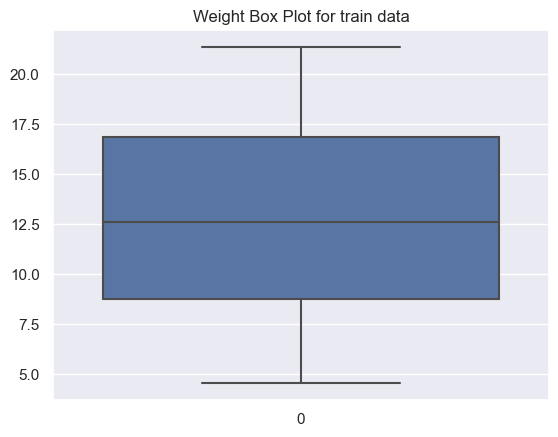

In [93]:
sns.boxplot(data=train_data['Item_Weight'],orient="v")
plt.title("Weight Box Plot for train data")


Text(0.5, 1.0, 'Weight Box Plot for test data')

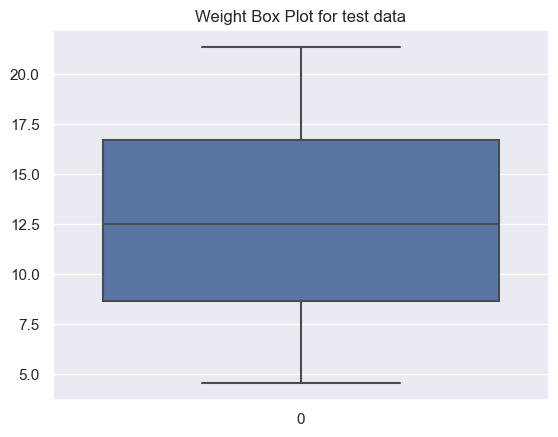

In [94]:
sns.boxplot(data=test_data['Item_Weight'],orient="v")
plt.title("Weight Box Plot for test data")

from these graphes there are no outliers in the weight column so we can use the mean value to replace the missing values.

In [95]:
#using mean values to replace missing values

train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
test_data['Item_Weight']=test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())
train_data['Item_Weight'].isnull().sum(),test_data['Item_Weight'].isnull().sum()

(0, 0)

In [96]:
#checking_duplicates
train_data.duplicated().sum(),test_data.duplicated().sum()

(0, 0)

In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [98]:
#more exploration in categorical data columns

print(train_data['Item_Fat_Content'].value_counts(),"\n",train_data['Item_Type'].value_counts(),"\n",train_data['Outlet_Identifier'].value_counts(),"\n",train_data['Outlet_Size'].value_counts(),"\n",train_data['Outlet_Location_Type'].value_counts(),"\n",train_data['Outlet_Type'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 
 OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 
 Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64 
 Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 
 Supermarket Type1    5

if we look at the "Item_Fat_Content" we will find that LF and Low fat will refer to the same type, also reg and Regular, we need to fix that.

In [99]:
#replacing the value.
train_data['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
test_data['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
print(train_data['Item_Fat_Content'].value_counts(),"\n\n",test_data['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64 

 Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


# Data Visualization

* Univirate Analysis

First we study the categorical columns which are ('Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type')

Text(0.5, 0, 'Item_Fat_Content')

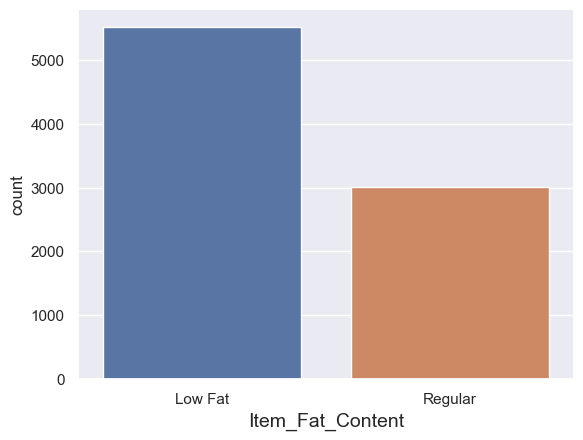

In [100]:
sns.countplot(x='Item_Fat_Content', data=train_data)
plt.xlabel('Item_Fat_Content', fontsize=14)

Text(0.5, 0, 'Item_Type')

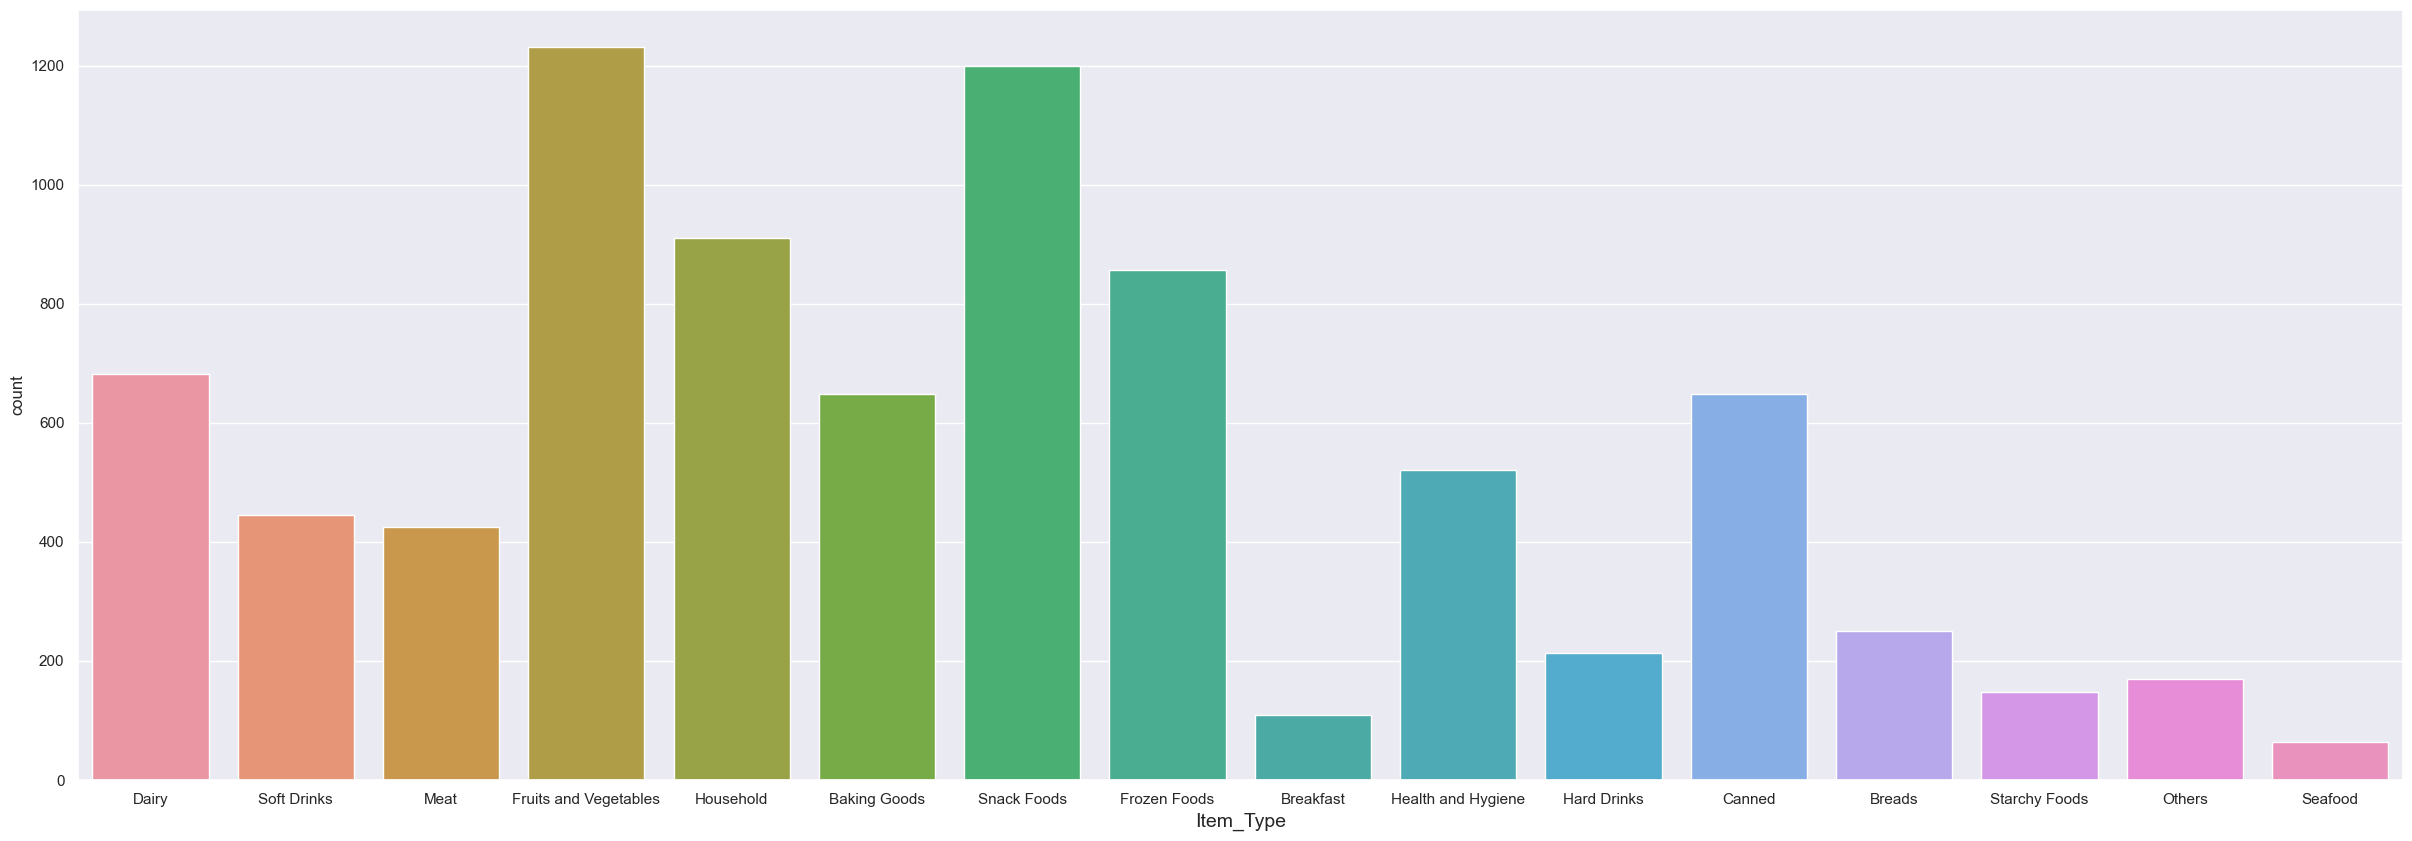

In [101]:
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type', data=train_data)
plt.xlabel('Item_Type', fontsize=14)

Text(0.5, 0, 'Outlet_Identifier')

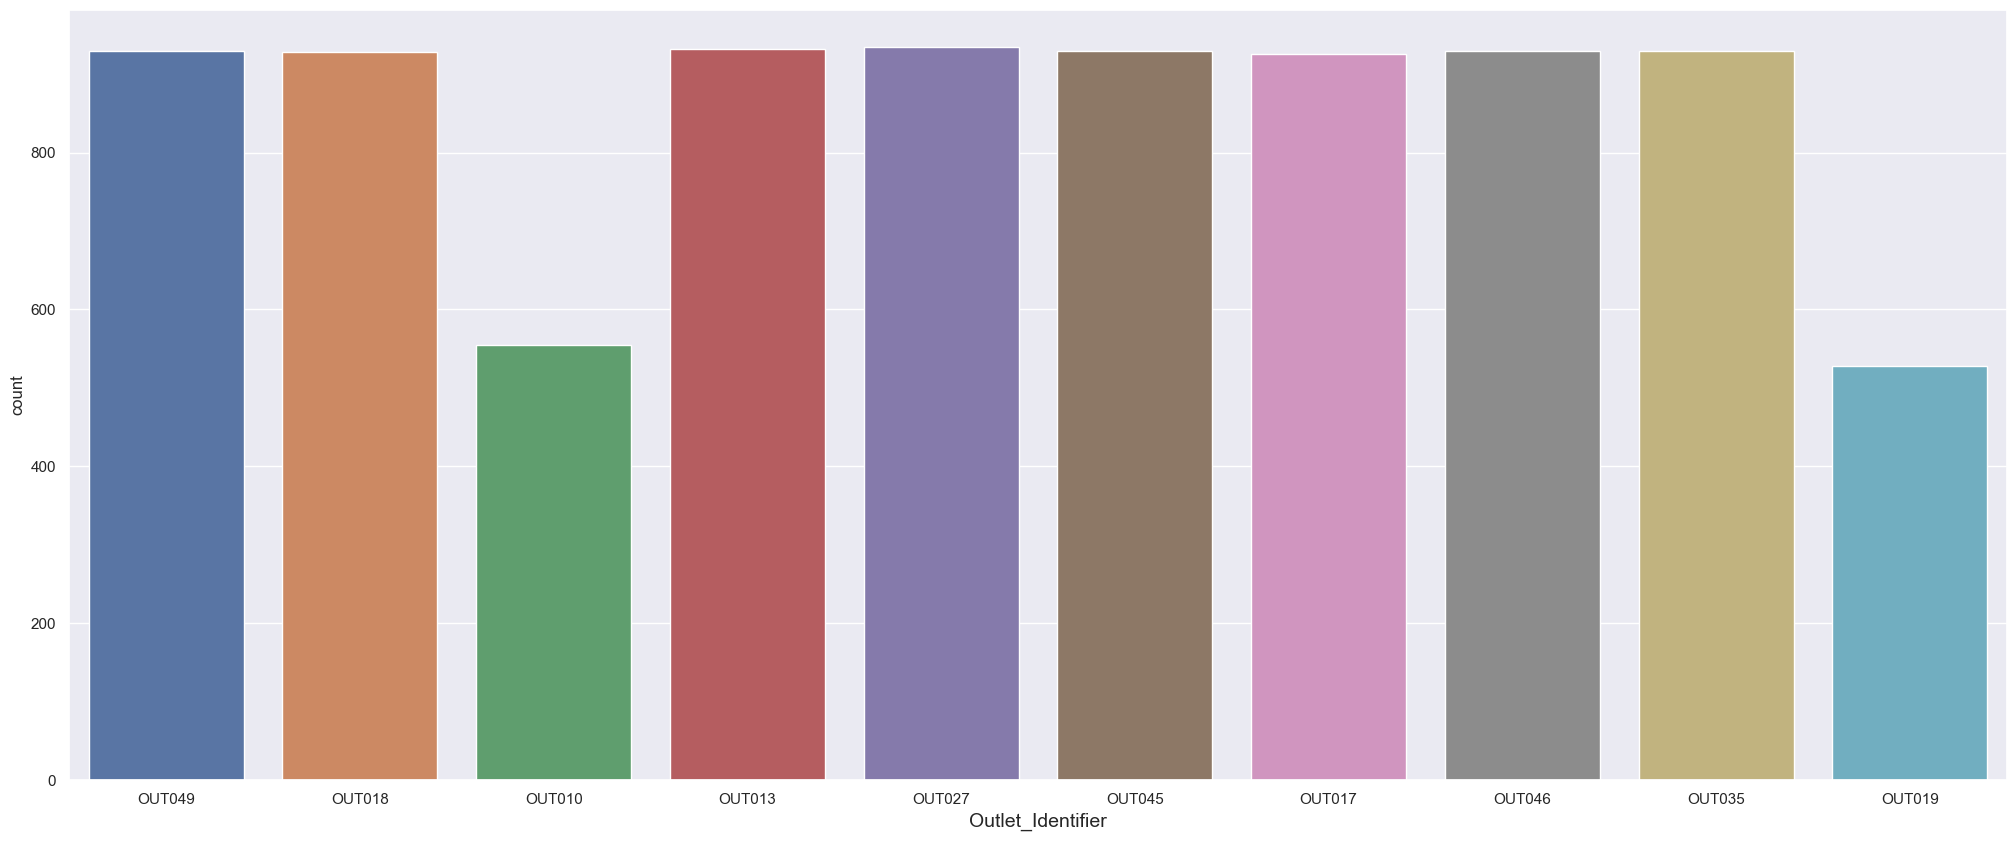

In [102]:
plt.figure(figsize=(25,10))
sns.countplot(x='Outlet_Identifier', data=train_data)
plt.xlabel('Outlet_Identifier', fontsize=14)

Text(0.5, 0, 'Outlet_Size')

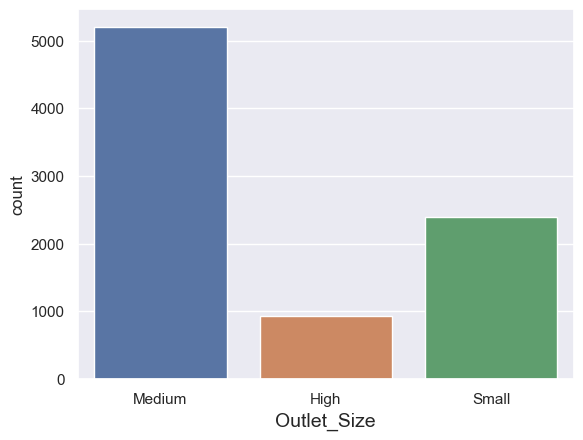

In [103]:
sns.countplot(x='Outlet_Size', data=train_data)
plt.xlabel('Outlet_Size', fontsize=14)

Text(0.5, 0, 'Outlet_Location_Type')

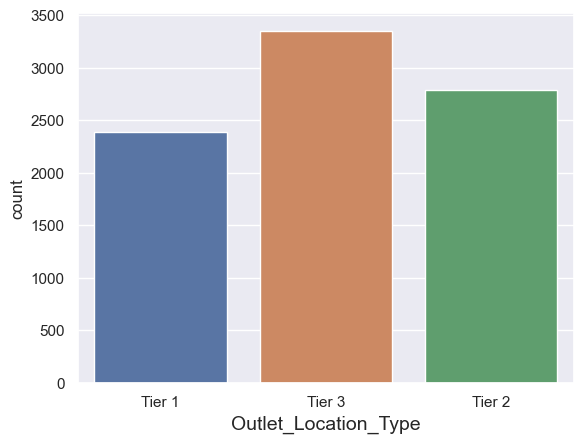

In [104]:
sns.countplot(x='Outlet_Location_Type', data=train_data)
plt.xlabel('Outlet_Location_Type', fontsize=14)

Text(0.5, 0, 'Outlet_Type')

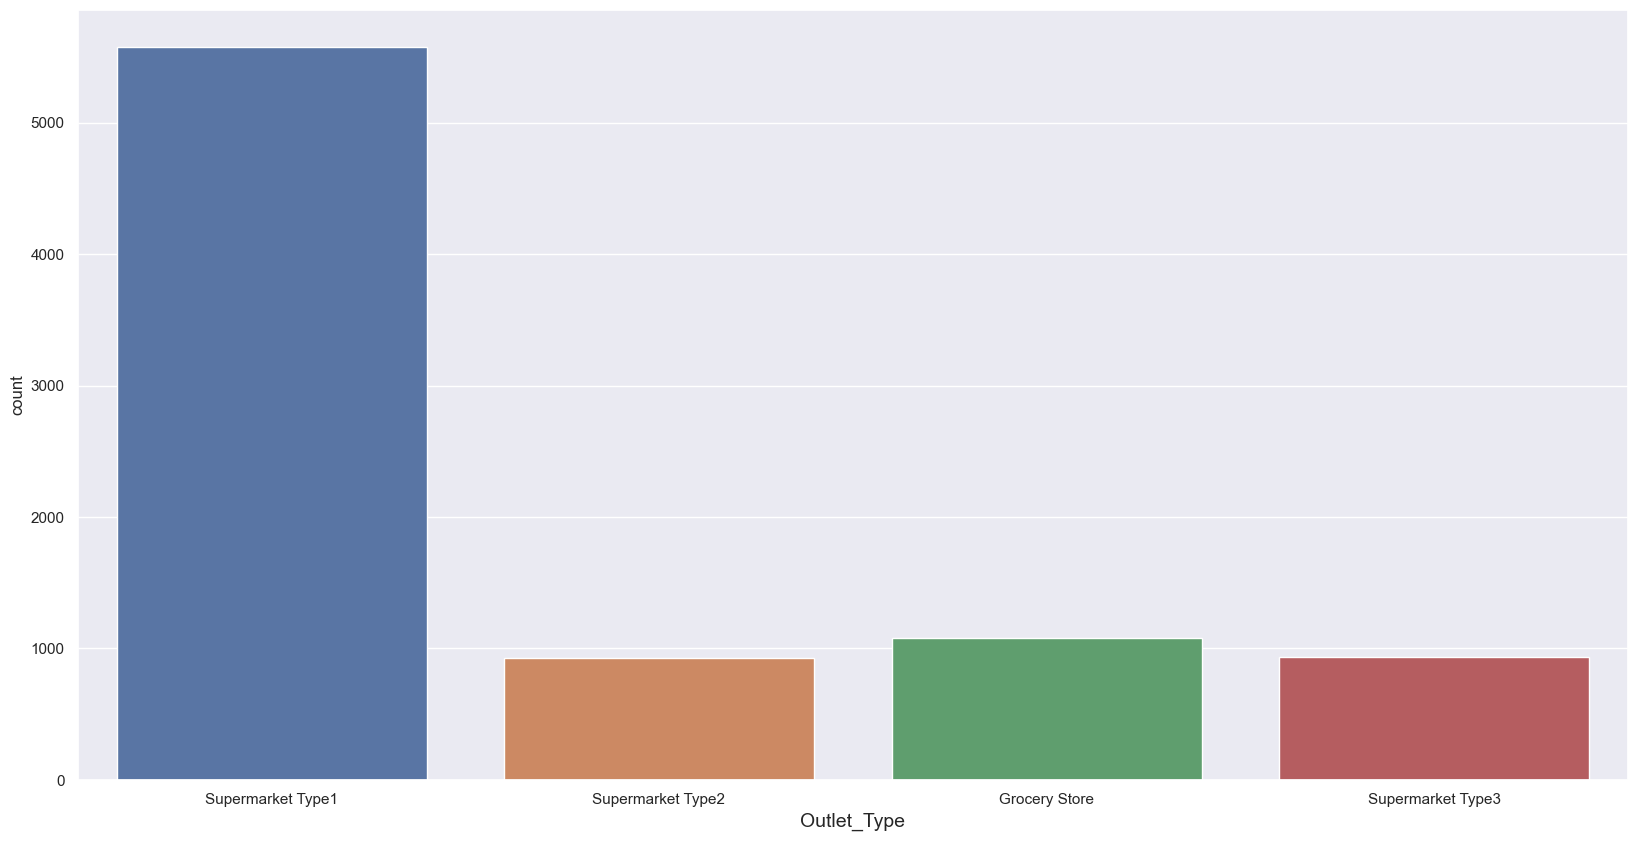

In [105]:
plt.figure(figsize=(20,10))
sns.countplot(x='Outlet_Type', data=train_data)
plt.xlabel('Outlet_Type', fontsize=14)

From these graphs we notice the following:
* in Item_Fat_Content column: the most items sold are low fat.
* in Item_Type : Item types that are distictly popular are fruits and vegetables and snack foods and the ones which are least popular are breakfast and seafood.
* in Outlet_Identifier : Sold items are evenly among outlets except OUT010 and OUT019 which are lower.
* in Outlet_Size : Bigmart outlets are mostly medium sized in this data.
* in Outlet_Location_Type:  The most common type is Tier3.
* in Outlet_Type: the most popular outlet type is Supermarket Type1.

now we take a look at the numerical data.

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

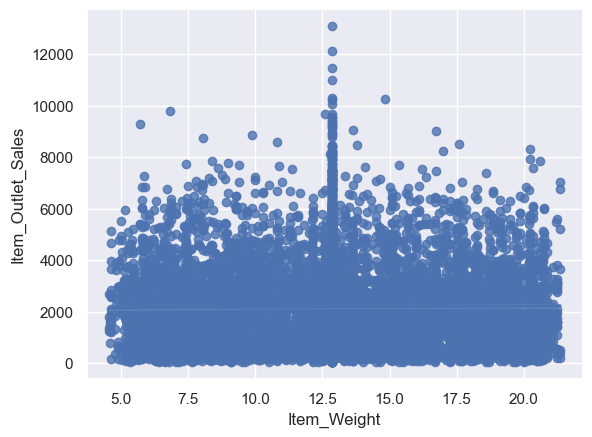

In [106]:
# comapring weights with the sales
sns.regplot(data=train_data,x='Item_Weight',y='Item_Outlet_Sales')

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

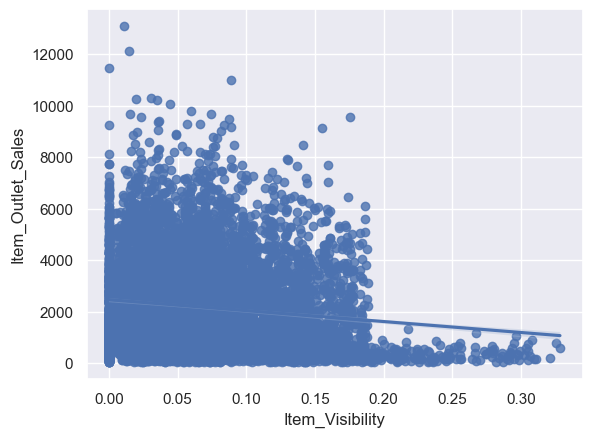

In [107]:
# comapring item visibility with the sales
sns.regplot(data=train_data,x='Item_Visibility',y='Item_Outlet_Sales')

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

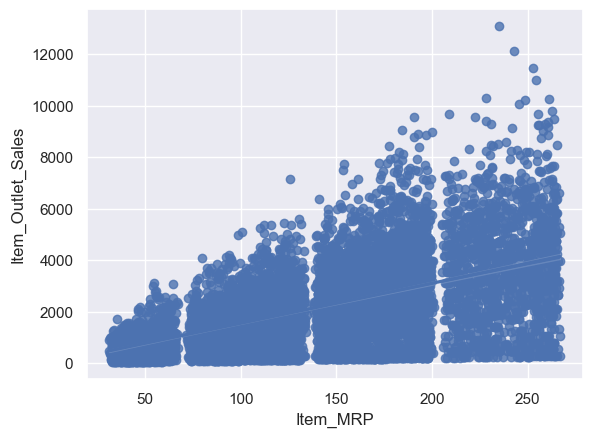

In [108]:
# comapring item MPR with the sales
sns.regplot(data=train_data,x='Item_MRP',y='Item_Outlet_Sales')

Text(0.5, 0, 'Outlet_Establishment_Year')

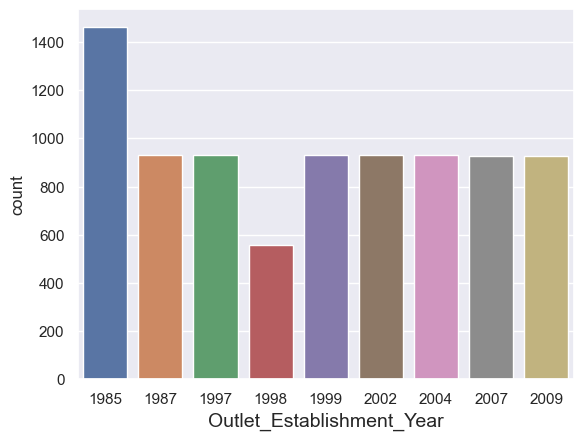

In [109]:
# seeing what year has the most oulets 
sns.countplot(x='Outlet_Establishment_Year', data=train_data)
plt.xlabel('Outlet_Establishment_Year', fontsize=14)

From these figures we deduce that:
* The slope of the line in the Weight vs Sales figure is neither negative nor positive so we can't decide weight's effect on the sales.
* The slope of the line in Visibility vs Sales is negative so normaly we can say that as Visibility increase sales decrease, but if we took a closer look we find that around the (0,0) point the density of points with low sales are quite high so we need to take that in our consideration.
* The slope of the line in MPR vs Sales is positive which leads to that the higher MPR the higher the sales.

* Bivariate Analysis 

In [110]:
#create a correlation matrix
print("train data correlation matrix","\n\n",train_data.corr(),"\n\n","test data correlation matrix","\n\n",test_data.corr())

train data correlation matrix 

                            Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000   

 test data correlation matrix 

                            Item_Weight  Item_Visibility  Item_MRP  \
Item

<Axes: >

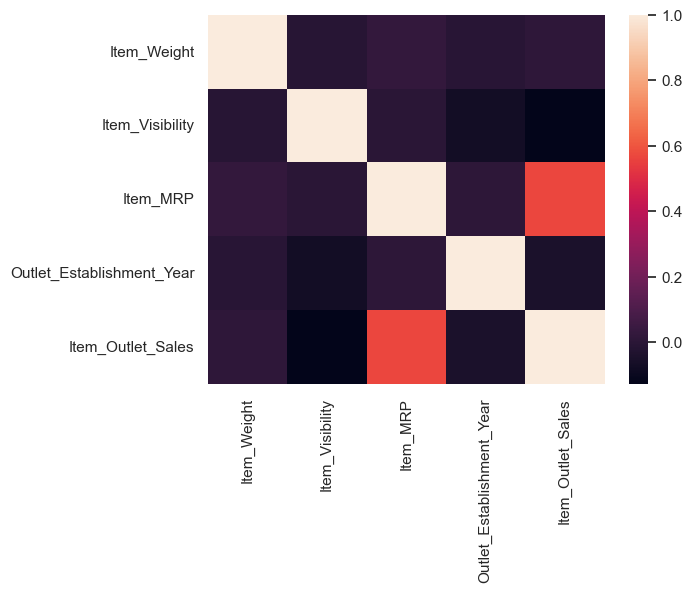

In [111]:
#visualizing the train data matrix with heat map
sns.heatmap(train_data.corr())

<Axes: >

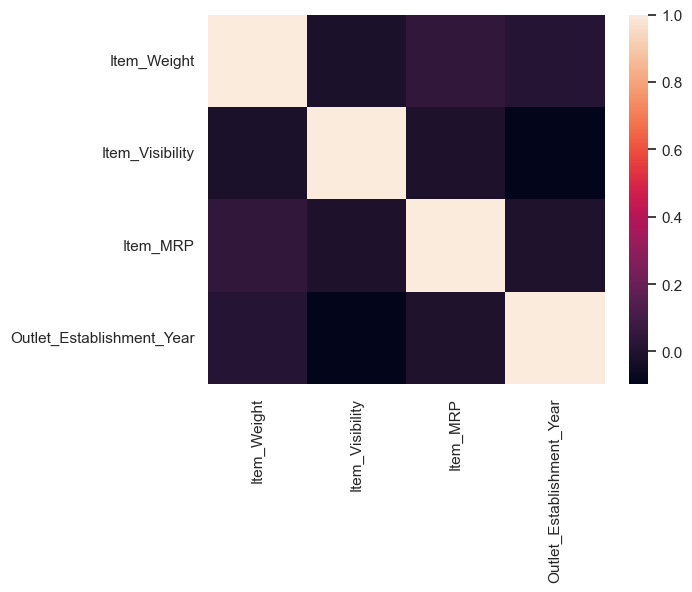

In [112]:
#visualizing the test data matrix with heat map
sns.heatmap(test_data.corr())

from these graphs we can make sure the Item_Outlet_Sales is highly correlated with Item_MRP.

we can also try to see the relation between some of the categorical columns with the Oultlet_Sales

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

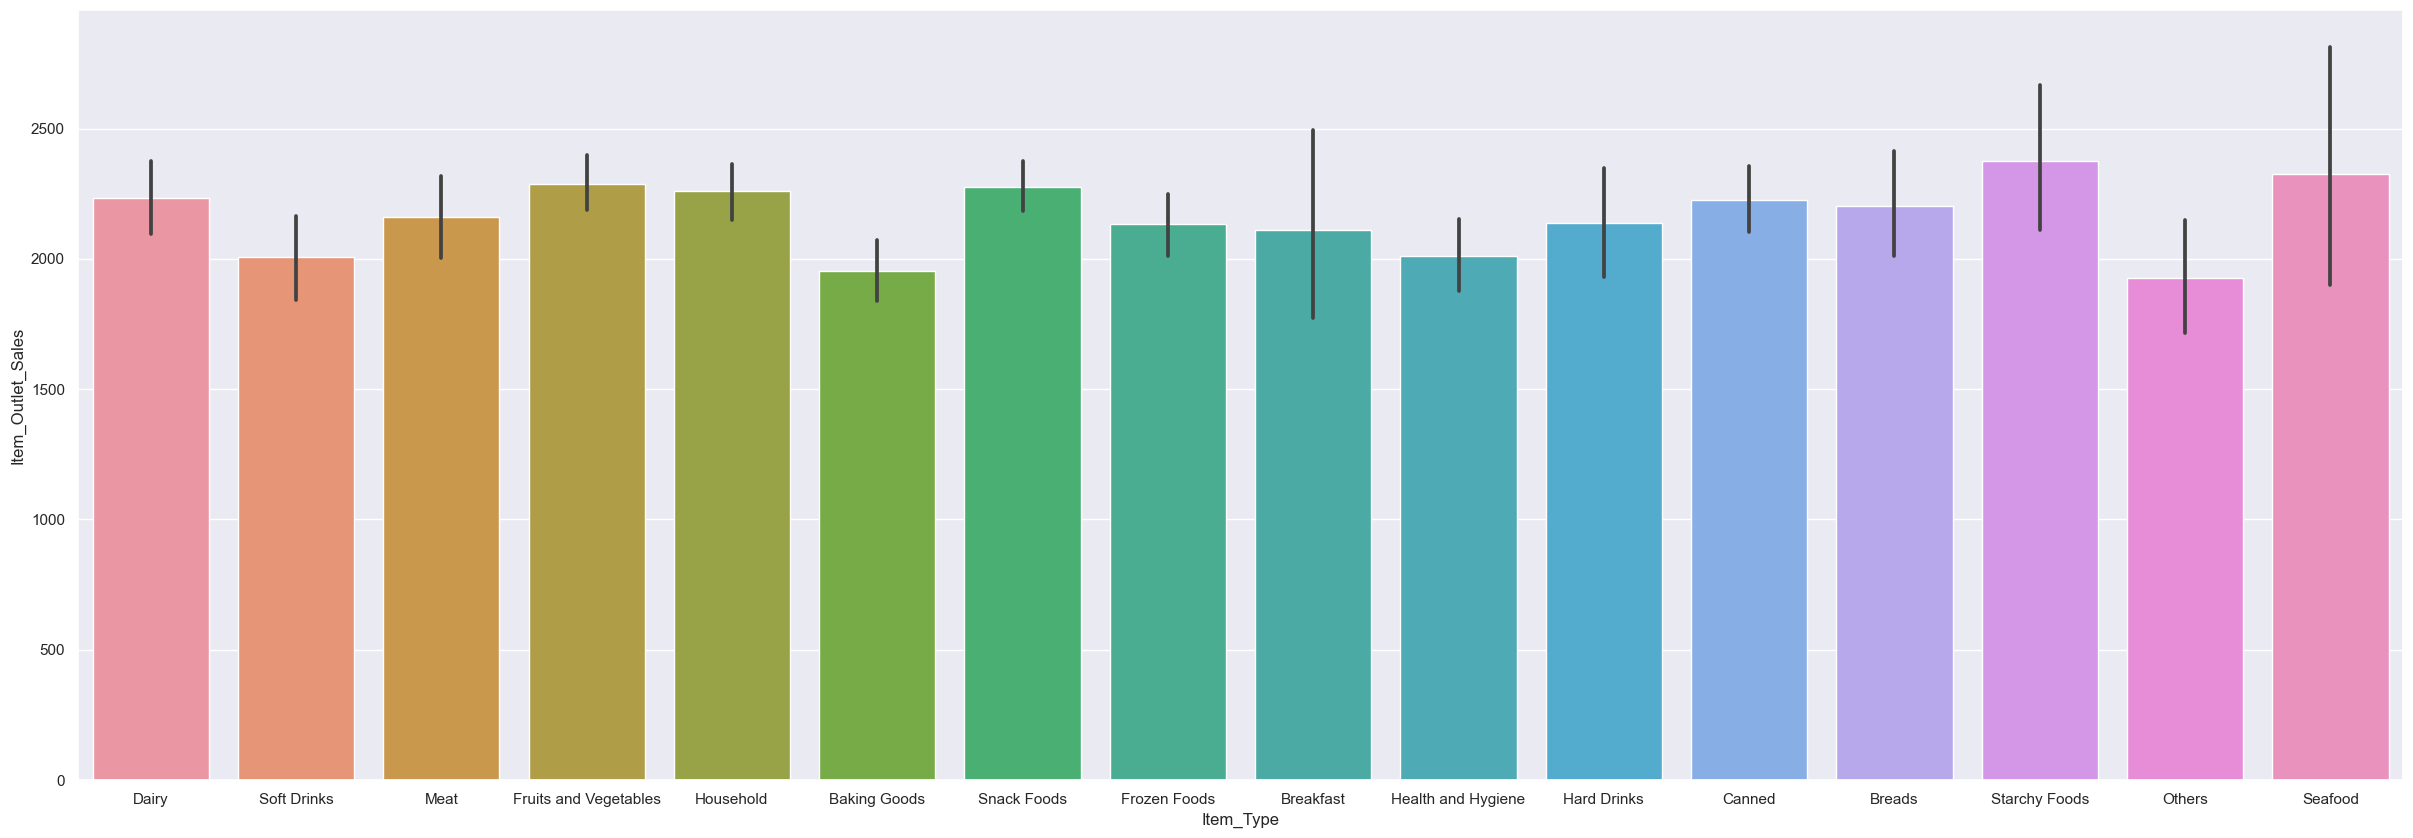

In [113]:
#Visualizing item types with sales
plt.figure(figsize=(30,10))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=train_data)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

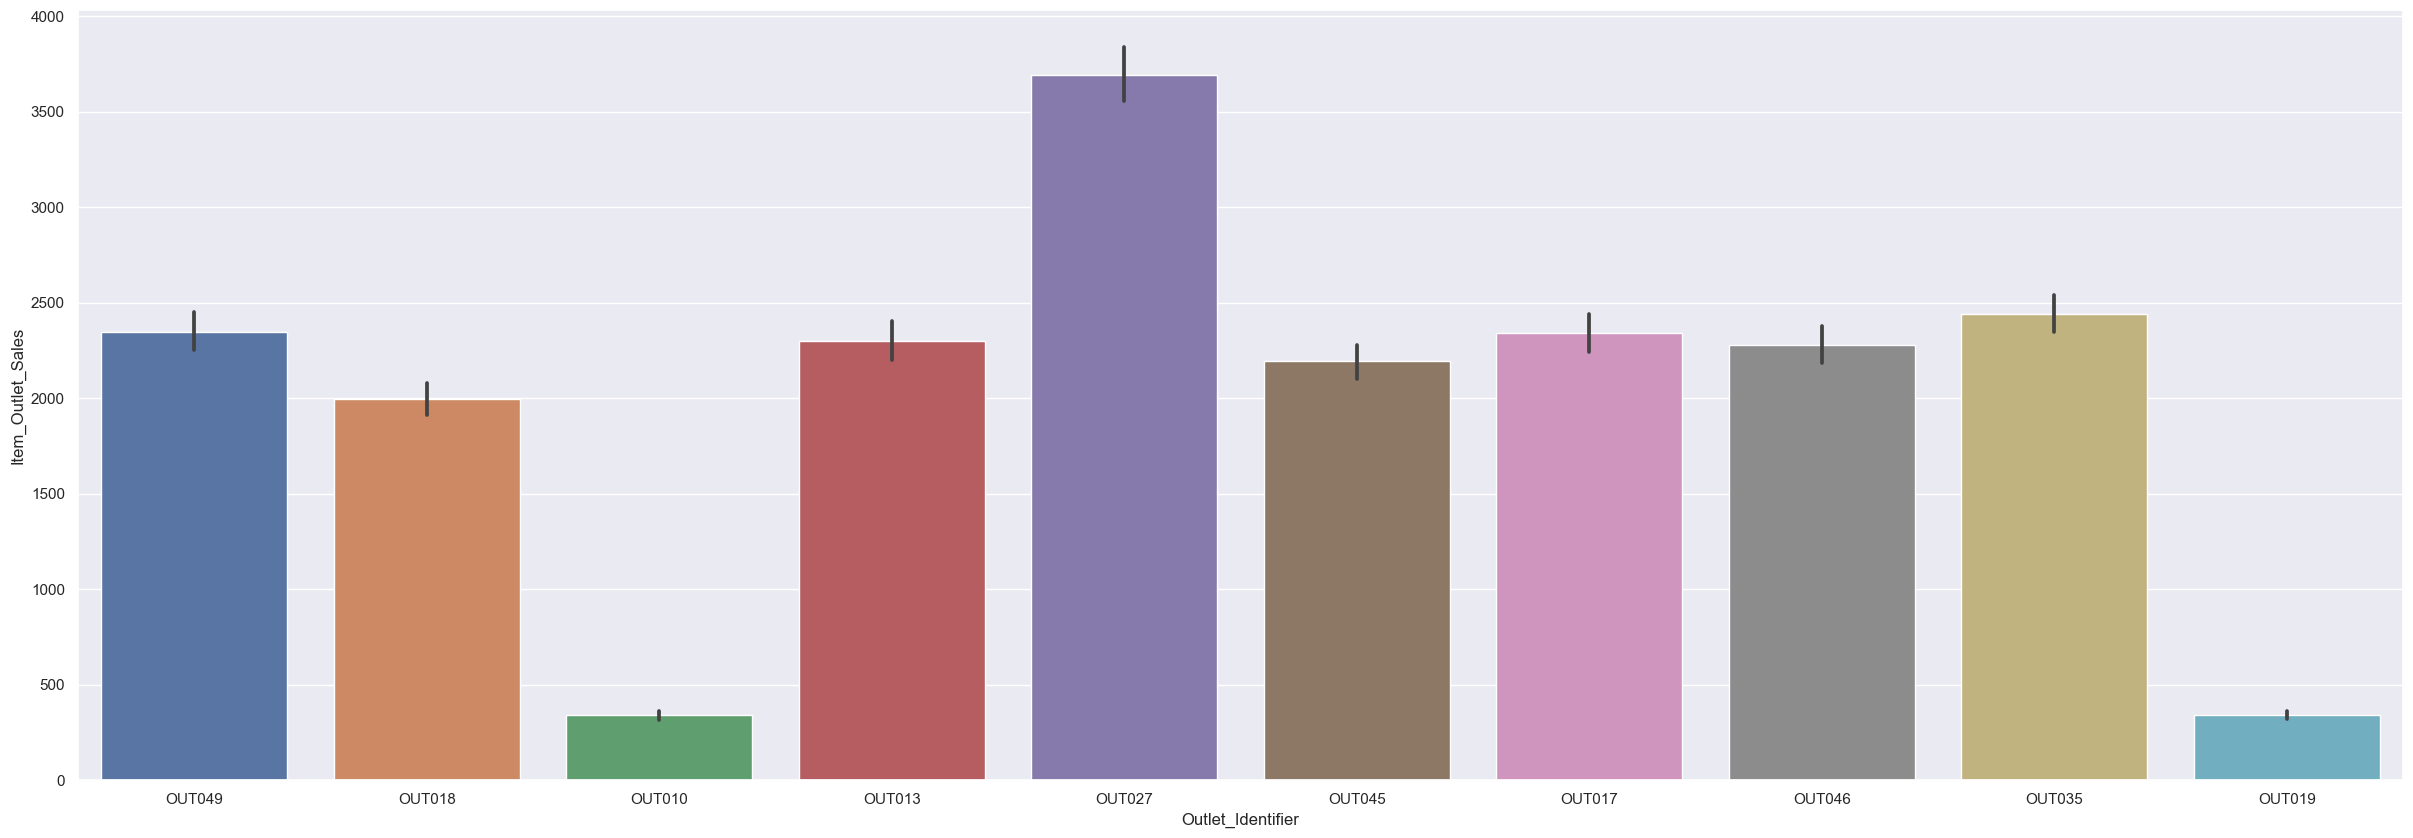

In [114]:
#Visualizing outlet identifier with sales
plt.figure(figsize=(30,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=train_data)

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

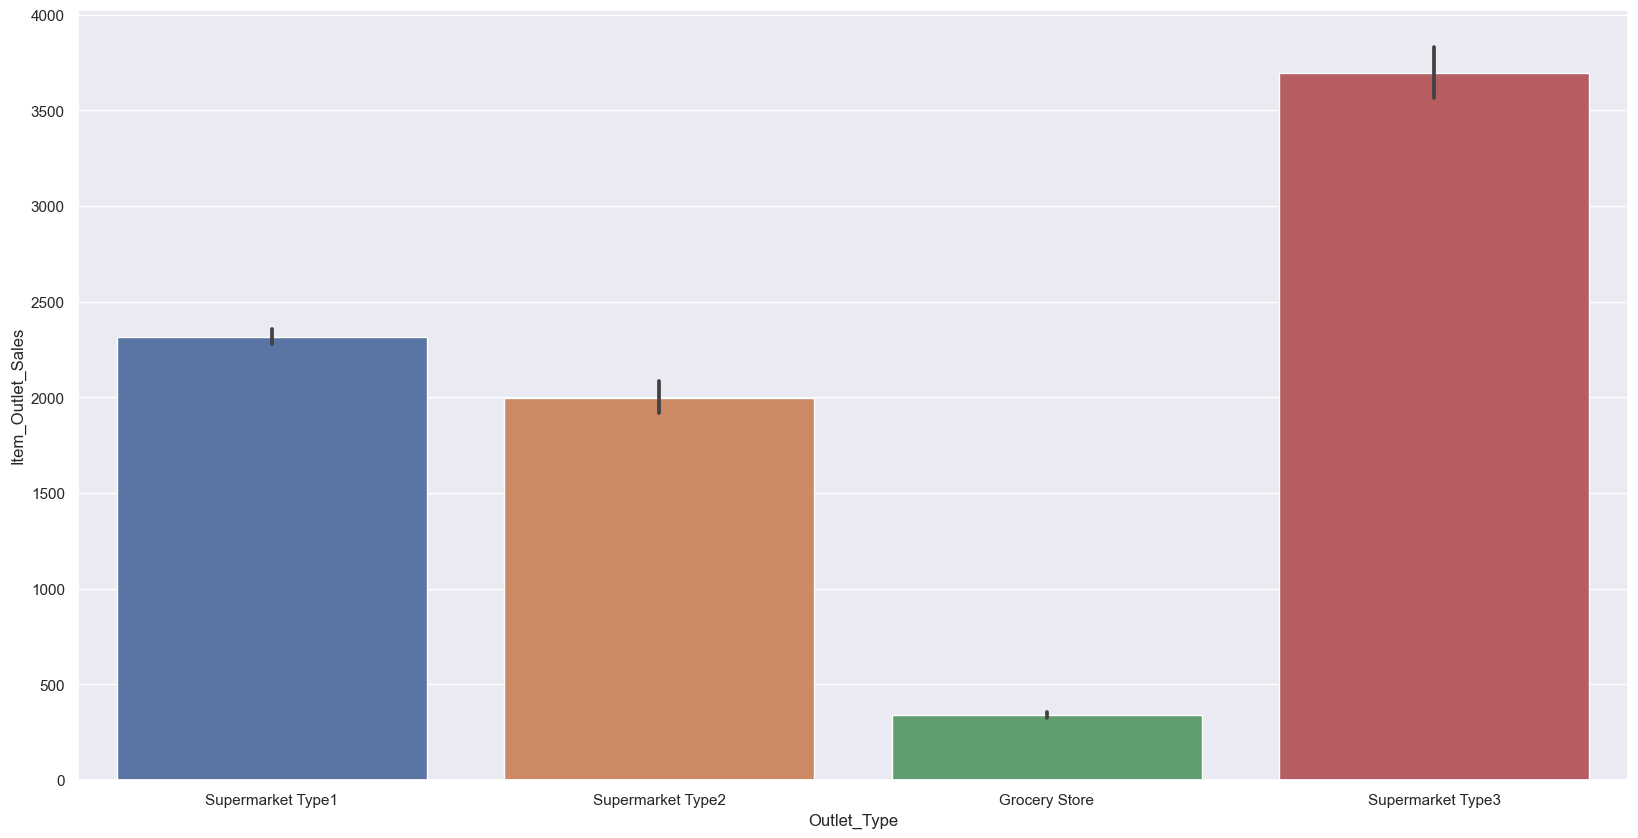

In [115]:
#Visualizing outlet type with sales
plt.figure(figsize=(20,10))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=train_data)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

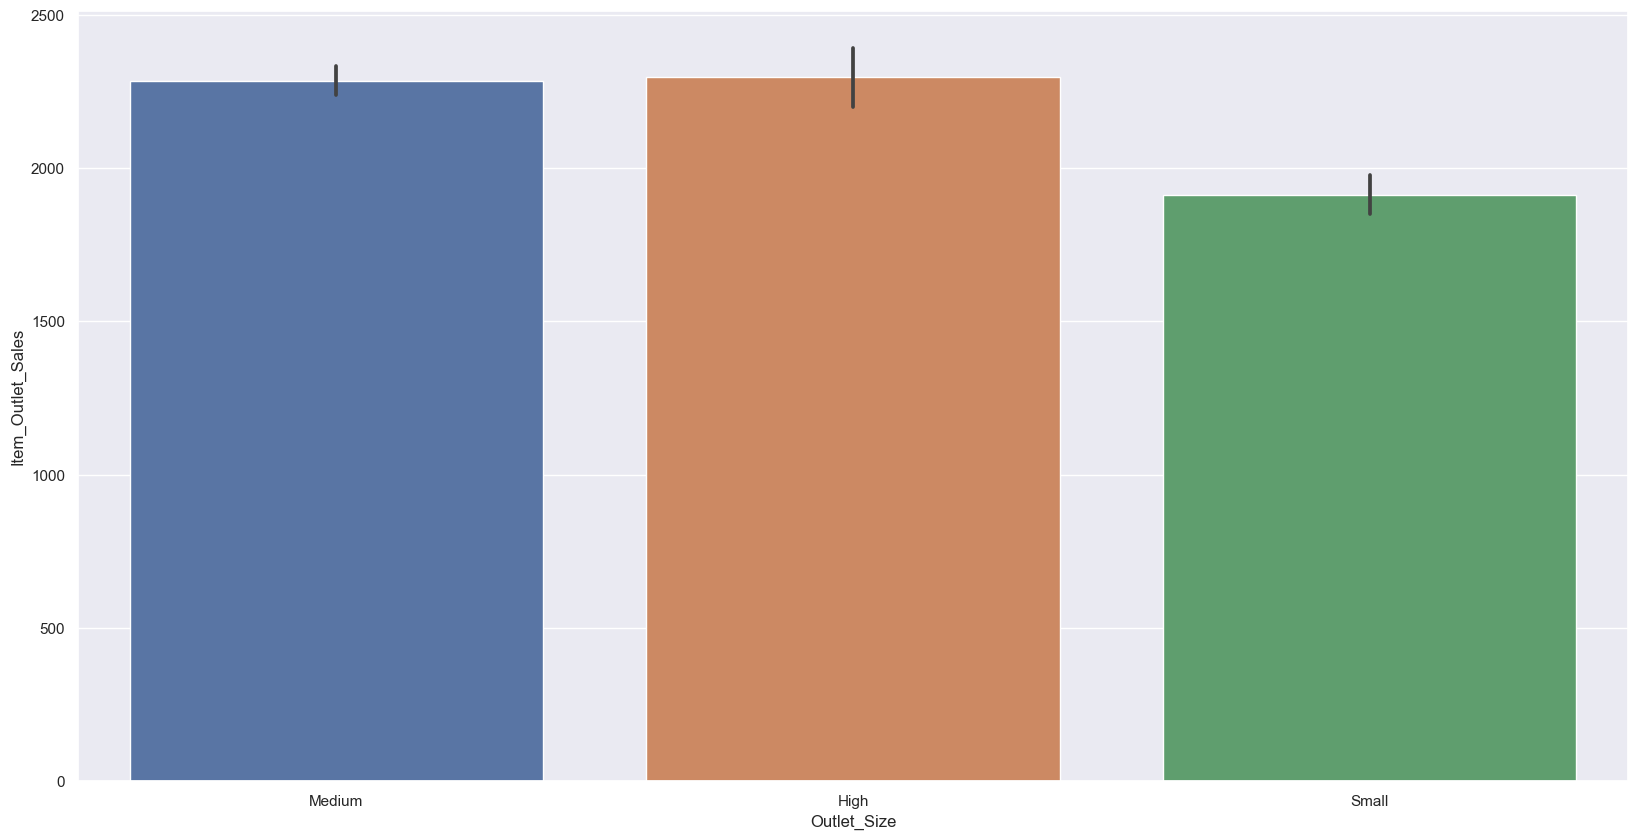

In [116]:
#Visualizing outlet size with sales
plt.figure(figsize=(20,10))
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=train_data)

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

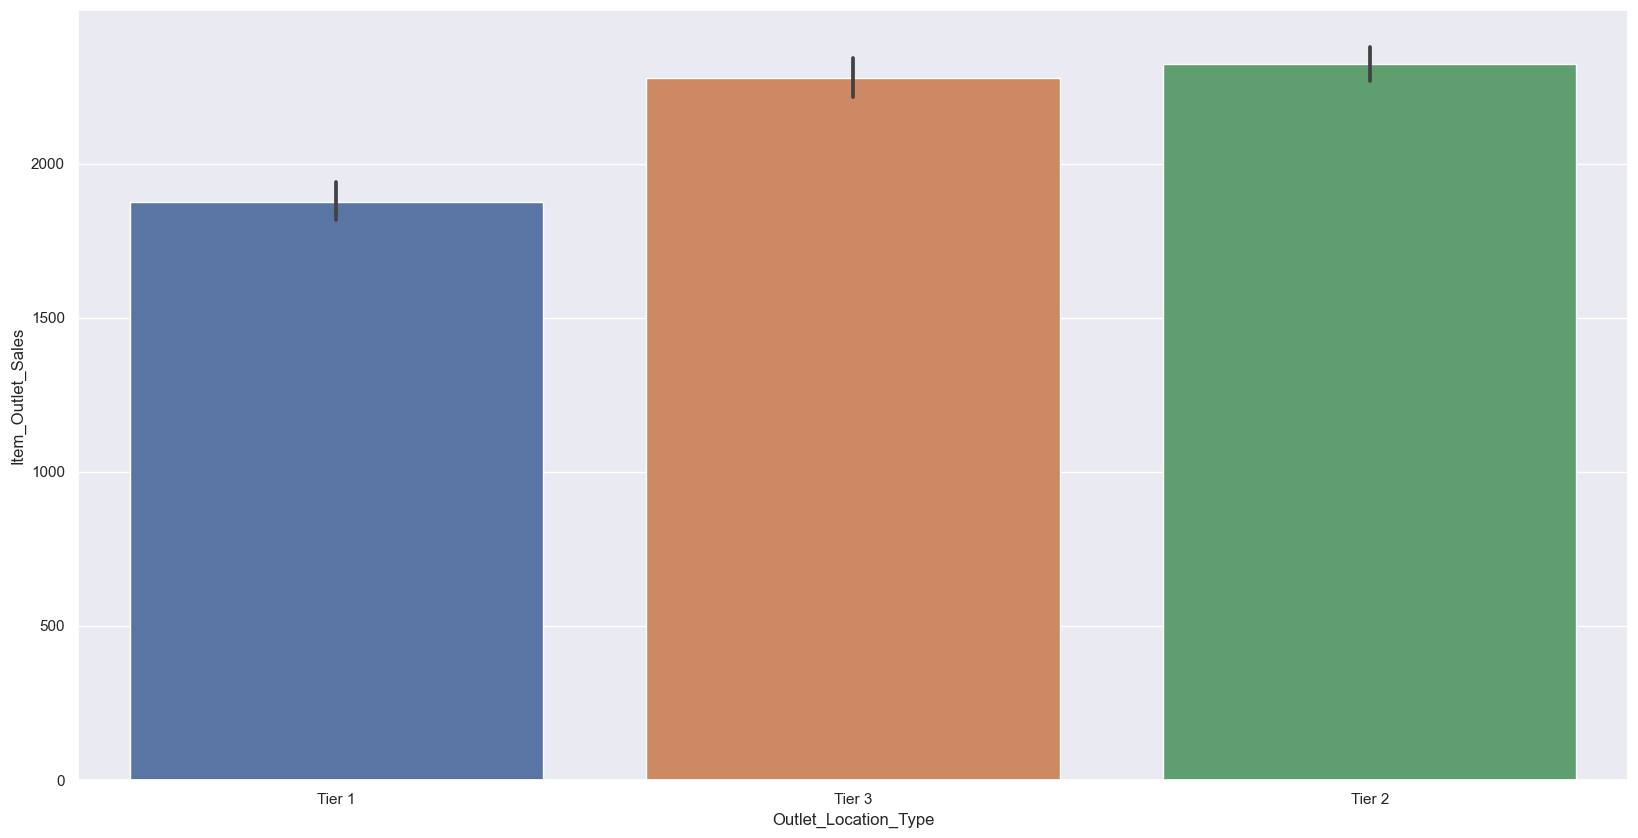

In [117]:
#Visualizing outlet location type with sales
plt.figure(figsize=(20,10))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=train_data)

From the Perivous graphs we can deduce that:

* There is small differences between the items sales.
* Outlet identifiers OUT010 and OUT019 have the lowest sales and OUT027 has the highest sales.
* Supermarket 3 has the best sales suprisingly as supermarket 1 has more products.
* Medium and high store sizes have similar sales which are higher than the sales of small size.
* Tier 2 and Tier 3 have similar sales which are higher than the sales of Tier 1.


In [118]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [119]:
train_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# Feature Engineering

* If we look at the categorical columns, The columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier don't have significant values so we will drop them.
* all the ordinal variable columns should be labeled encoded
* all of the nominal variable columns should be one hot encoded

## Label Encoding of ordinal variable columns

we have :
* Item_Fat_Content
* Outlet_Size
* Outlet_Location_Type

In [120]:
#label encoding of ordinal variables
label_encod=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
for i in label_encod:
    train_data[i]=LabelEncoder().fit_transform(train_data[i])
    test_data[i]=LabelEncoder().fit_transform(test_data[i])
    
train_data['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

## One hot encoding of nominal variable columns

we have:
* Outlet_Type 
* Item_Type

In [121]:
#one hot encoding of nominal variables
one_hot_col=['Outlet_Type','Item_Type']

train_data_oh=pd.get_dummies(train_data[one_hot_col])
test_data_oh=pd.get_dummies(test_data[one_hot_col])


#adding the one hot encoded columns to the main columns

train_data_fea=pd.concat([train_data,train_data_oh],axis=1)
test_data_fea=pd.concat([test_data,test_data_oh],axis=1)

#dropping the un-needed columns

train_data_fea=train_data_fea.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test_data_fea=test_data_fea.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

train_data_fea.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,1,0,3735.1380,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [122]:
test_data_fea.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,0,0.007565,107.8622,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,1,0.038428,87.3198,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0,0.099575,241.7538,1,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,1,0.118599,234.2300,1,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [140]:
#saving results of the featured engineered sets as a csv
train_data_modified=test_data_fea
train_data_modified.to_csv("train_data_modified.csv")

test_data_fea.to_csv("test_data_modified.csv")

# Modeling
## Linear Regression

we need to predict the sales of the products and know what aspects will increase the sales of products.

In [123]:
y=train_data_fea['Item_Outlet_Sales']
X=train_data_fea.drop('Item_Outlet_Sales',axis=1)
columns_names=X.columns


# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the training data
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

# Make predictions on the testing data
y_pred=lr_model.predict(X_test)

# Evaluate the performance of the model
mse=MSE(y_test,y_pred)
rmse=np.sqrt(mse)
r2=R2(y_test,y_pred)

print("MSE=",mse,"\n","RMSE=",rmse,"\n","R2=",r2)

#viewin effect of each feature on the model
coef_lin=pd.Series(lr_model.coef_,columns_names).sort_values()

print(coef_lin)

MSE= 1146802.0992307647 
 RMSE= 1070.8884625537642 
 R2= 0.5780666927438673
Outlet_Type_Grocery Store         -1727.794678
Item_Visibility                    -464.142695
Outlet_Type_Supermarket Type2      -114.501666
Item_Type_Dairy                     -99.881734
Item_Type_Others                    -60.599435
Item_Type_Soft Drinks               -41.656204
Item_Type_Breads                    -38.762568
Item_Type_Household                 -27.192124
Item_Type_Frozen Foods              -22.952328
Item_Type_Snack Foods               -19.071835
Item_Type_Baking Goods              -10.930565
Item_Type_Meat                       -9.118271
Item_Type_Hard Drinks                -6.626925
Item_Weight                          -1.623720
Item_Type_Health and Hygiene          2.141625
Outlet_Size                          12.253445
Item_Type_Canned                     13.015327
Item_Type_Starchy Foods              14.696628
Outlet_Location_Type                 14.705829
Item_MRP                       

<Axes: >

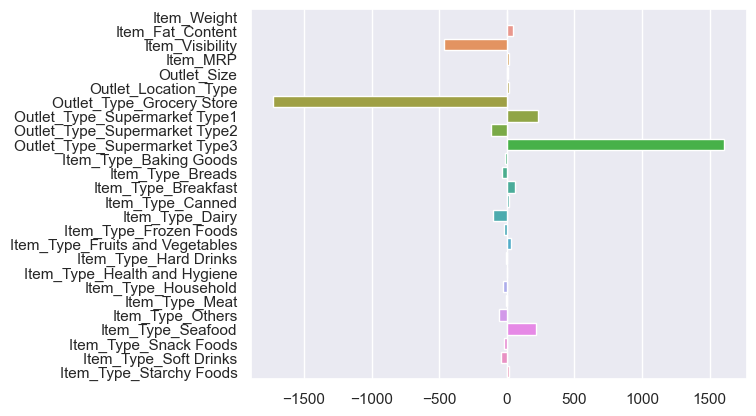

In [124]:
#Visualizing
sns.barplot(x=lr_model.coef_, y=columns_names)

In [125]:
#saving results of the test model as a csv
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Linear_Regression.to_csv("Linear Regression.csv") 

#  Regularized linear regression
## Lasso regularization 

In [126]:
# Create a Lasso model and fit it to the training data
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the performance of the model
mse_lasso=MSE(y_test,y_pred_lasso)
rmse_lasso=np.sqrt(mse_lasso)
r2_lasso=R2(y_test,y_pred_lasso)

print("MSE_lasso=",mse_lasso,"\n","RMSE_lasso=",rmse_lasso,"\n","R2_lasso=",r2_lasso)

#viewin effect of each feature on the model
coef_lin_lasso=pd.Series(lasso_model.coef_,columns_names).sort_values()

print(coef_lin_lasso)

MSE_lasso= 1146442.0798520362 
 RMSE_lasso= 1070.720355579381 
 R2_lasso= 0.5781991516635407
Outlet_Type_Grocery Store         -1962.242860
Item_Visibility                    -423.591035
Outlet_Type_Supermarket Type2      -346.592008
Item_Type_Dairy                     -88.732220
Item_Type_Others                    -45.372482
Item_Type_Soft Drinks               -29.404820
Item_Type_Breads                    -24.960117
Item_Type_Household                 -15.986386
Item_Type_Frozen Foods              -11.698157
Item_Type_Snack Foods                -8.118911
Item_Weight                          -1.614686
Item_Type_Hard Drinks                 0.000000
Outlet_Type_Supermarket Type1         0.000000
Item_Type_Meat                        0.000000
Item_Type_Baking Goods               -0.000000
Item_Type_Health and Hygiene         11.051647
Outlet_Size                          11.104425
Outlet_Location_Type                 13.768514
Item_MRP                             15.657093
Item_Type_Star

<Axes: >

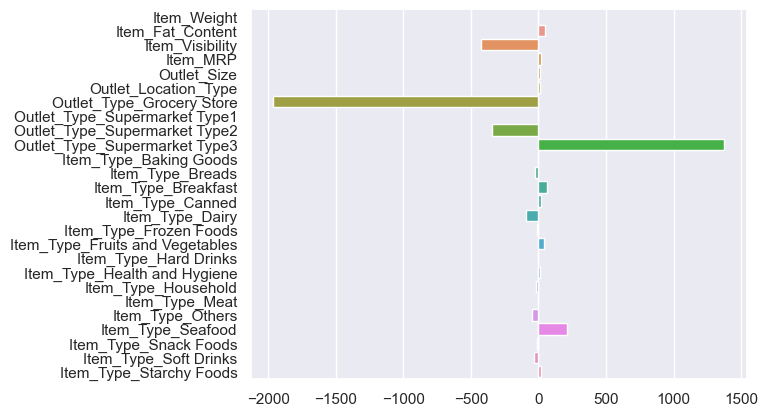

In [127]:
#Visualizing
sns.barplot(x=lasso_model.coef_, y=columns_names)

In [128]:
#saving results of the test model as a csv
Linear_Regression_lasso_reg=pd.DataFrame({'y_test':y_test,'prediction':y_pred_lasso})
Linear_Regression_lasso_reg.to_csv("Linear Regression_lasso.csv")

## Ridge regularization

In [129]:
## Create a Ridge model and fit it to the training data

ridge_model=Ridge(alpha=0.1)
ridge_model.fit(X_train,y_train)

## Make predictions on the testing data

y_pred_ridge=ridge_model.predict(X_test)

## Evaluate the performance of the Ridge model

mse_ridge=MSE(y_test,y_pred_ridge)
rmse_ridge=np.sqrt(mse_ridge)
r2_ridge=R2(y_test,y_pred_ridge)

print("MSE_ridge=",mse_ridge,"\n","RMSE_ridge=",rmse_ridge,"\n","R2_ridge=",r2_ridge)

#viewin effect of each feature on the model
coef_lin_ridge=pd.Series(ridge_model.coef_,columns_names).sort_values()

print(coef_lin_ridge)

MSE_ridge= 1146791.10828729 
 RMSE_ridge= 1070.8833308476185 
 R2_ridge= 0.5780707365497981
Outlet_Type_Grocery Store         -1727.652697
Item_Visibility                    -461.797021
Outlet_Type_Supermarket Type2      -114.486986
Item_Type_Dairy                     -99.857270
Item_Type_Others                    -60.524420
Item_Type_Soft Drinks               -41.609654
Item_Type_Breads                    -38.717457
Item_Type_Household                 -27.153331
Item_Type_Frozen Foods              -22.919514
Item_Type_Snack Foods               -19.037612
Item_Type_Baking Goods              -10.906740
Item_Type_Meat                       -9.075915
Item_Type_Hard Drinks                -6.591888
Item_Weight                          -1.623428
Item_Type_Health and Hygiene          2.194687
Outlet_Size                          12.255911
Item_Type_Canned                     13.045955
Item_Type_Starchy Foods              14.706631
Outlet_Location_Type                 14.754921
Item_MRP       

<Axes: >

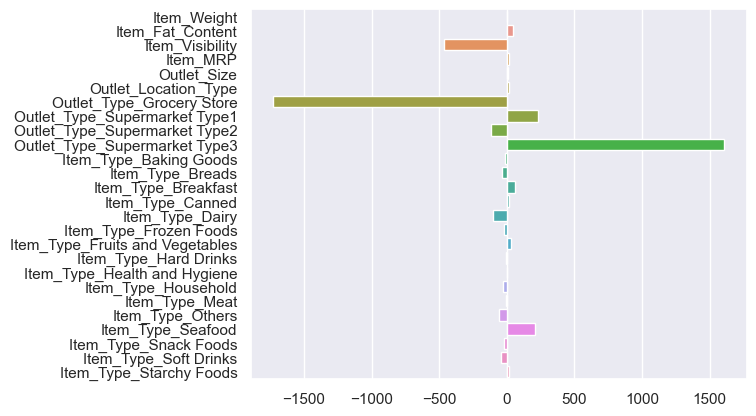

In [130]:
#Visualizing
sns.barplot(x=ridge_model.coef_, y=columns_names)

In [131]:
#saving results of the test model as a csv
Linear_Regression_ridge=pd.DataFrame({'y_test':y_test,'prediction':y_pred_ridge})
Linear_Regression_ridge.to_csv("Linear Regression_ridge.csv")

## RandomForest model

In [132]:
# Create a RandomForest model and fit it to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the RandomForest model
mse_rf=MSE(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
r2_rf=R2(y_test,y_pred_rf)

print("MSE_rf=",mse_rf,"\n","RMSE_rf=",rmse_rf,"\n","R2_rf=",r2_rf)

#viewin effect of each feature on the model
coef_rf=pd.Series(rf_model.feature_importances_,columns_names).sort_values()

print(coef_rf)

MSE_rf= 1224790.2587184876 
 RMSE_rf= 1106.7024255501058 
 R2_rf= 0.5493731613302558
Item_Type_Seafood                  0.001566
Item_Type_Others                   0.001706
Item_Type_Breakfast                0.002428
Item_Type_Breads                   0.002711
Item_Type_Hard Drinks              0.002771
Item_Type_Starchy Foods            0.003059
Outlet_Type_Supermarket Type2      0.003287
Item_Type_Meat                     0.003688
Item_Type_Health and Hygiene       0.004024
Outlet_Type_Supermarket Type1      0.004125
Item_Type_Baking Goods             0.004388
Item_Type_Canned                   0.004613
Item_Type_Soft Drinks              0.004982
Item_Type_Frozen Foods             0.006034
Item_Type_Dairy                    0.006306
Item_Type_Household                0.006651
Item_Type_Snack Foods              0.008121
Item_Type_Fruits and Vegetables    0.008298
Item_Fat_Content                   0.008621
Outlet_Location_Type               0.015779
Outlet_Size                        

<Axes: >

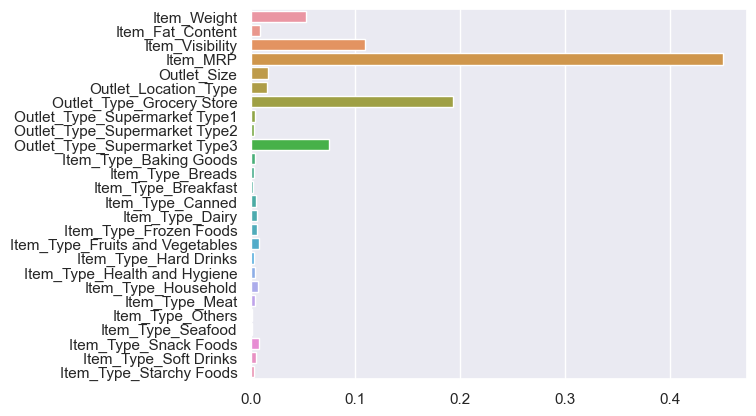

In [133]:
#Visualizing
sns.barplot(x=rf_model.feature_importances_, y=columns_names)

In [134]:
#saving results of the test model as a csv
Linear_Regression_randomforest=pd.DataFrame({'y_test':y_test,'prediction':y_pred_rf})
Linear_Regression_randomforest.to_csv("Linear Regression_randomforest.csv")

## XGBoost Model


In [135]:
# Create a DMatrix object for XGBoost
d_train=xgb.DMatrix(X_train,label=y_train) 
d_test=xgb.DMatrix(X_test)

# Set the hyperparameters for the XGBoost model
params = {
    "objective": "reg:squarederror",
    "eta": 0.14,
    "max_depth": 5,
    "min_child_weight": 7,
    "gamma": 0,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "nthread": 4,
    "seed": 42
}

# Train the XGBoost model
xgb_model=xgb.train(params, d_train, num_boost_round=100)

# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(d_test)


# Evaluate the performance of the model
mse_xgb=MSE(y_test,y_pred_xgb)
rmse_xgb=np.sqrt(mse_xgb)
r2_xgb=R2(y_test,y_pred_xgb)

print("MSE_xgb=",mse_xgb,"\n","RMSE_xgb=",rmse_xgb,"\n","R2_xgb=",r2_xgb)



MSE_xgb= 1095958.577584187 
 RMSE_xgb= 1046.8804027128347 
 R2_xgb= 0.5967731245295076


<Figure size 2000x3000 with 0 Axes>

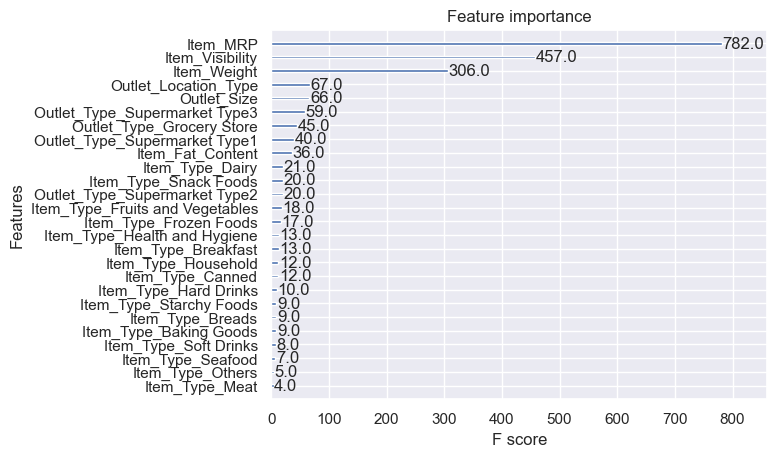

In [136]:
#Visualizing the importance of each Feature
plt.figure(figsize=(20,30))
xgb.plot_importance(xgb_model)
plt.show()


In [137]:
#saving results of the test model as a csv
Linear_Regression_xgboost=pd.DataFrame({'y_test':y_test,'prediction':y_pred_xgb})
Linear_Regression_xgboost.to_csv("Linear Regression_xgboost.csv")

In [138]:
#summarizing the performance of each model
MAE= [mse,mse_lasso,mse_ridge,mse_rf,mse_xgb]
MSE= [rmse,rmse_lasso,rmse_ridge,rmse_rf,rmse_xgb]
R_2= [r2,r2_lasso,r2_ridge,r2_rf,r2_xgb]

Models = pd.DataFrame({
    'models': ["Linear Regression","Lasso Regressor","Ridge Regressor","Random Forest Regressor","XGBoost model"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2,})
Models.sort_values(by='R^2', ascending=True)

,models,MAE,MSE,R^2
3,Random Forest Regressor,1.224790e+06,1106.702426,0.549373
0,Linear Regression,1.146802e+06,1070.888463,0.578067
2,Ridge Regressor,1.146791e+06,1070.883331,0.578071
1,Lasso Regressor,1.146442e+06,1070.720356,0.578199
4,XGBoost model,1.095959e+06,1046.880403,0.596773


# Conclusion


* Item_MRP optimizes Maximum Outlet sales (positive correlation with the target).
* XGBoost model and Lasso Regressor have the best perfomance in most categories.
